In [100]:
import pandas as pd
import numpy as np
import dolphindb as ddb
import preprocess
import factor_analysis
import group_calc

# 载入数据

In [101]:
# 读取数据
factor_df=pd.read_csv('factor_df.csv')
bp_df = pd.read_csv('pb.csv')
ret_df=pd.read_csv('ret_df.csv')
mktmv_df = pd.read_csv('mktmv_df.csv')
benchmark = pd.read_csv('index_ret.csv')
ind_df=pd.read_csv('ind_df.csv')
# 处理股票代码
codefunc1=lambda x: '{:0>6}'.format(x)
factor_df['stock_code']=factor_df['stock_code'].apply(codefunc1)
bp_df['stock_code']=bp_df['stock_code'].apply(codefunc1)
ret_df['stock_code']=ret_df['stock_code'].apply(codefunc1)
mktmv_df['stock_code']=mktmv_df['stock_code'].apply(codefunc1)
ind_df['stock_code']=ind_df['stock_code'].apply(codefunc1)
# 处理日期
codefunc2 = lambda x: x if np.isnan(x) else str(int(x))
factor_df['trade_date']=factor_df['trade_date'].apply(codefunc2)
bp_df['trade_date']=bp_df['trade_date'].apply(codefunc2)
ret_df['trade_date']=ret_df['trade_date'].apply(codefunc2)
mktmv_df['trade_date']=mktmv_df['trade_date'].apply(codefunc2)
ind_df['trade_date']=ind_df['trade_date'].apply(codefunc2)
benchmark['trade_date'] = benchmark['trade_date'].apply(codefunc2)
factor_df

trade_date stock_code   factor
0        20080104     000002 -0.21995
1        20080104     000006  1.59630
2        20080104     000009 -1.02290
3        20080104     000011  0.64091
4        20080104     000012  0.19340
...           ...        ...      ...
796198   20170120     603866 -0.17724
796199   20170120     603868 -1.07180
796200   20170120     603883 -0.21049
796201   20170120     603993 -0.37095
796202   20170120     603998 -0.96489

[796203 rows x 3 columns]

# 预处理

In [102]:
ind_df_copy = ind_df
ind_df_copy = ind_df_copy.rename(columns={"ind_code" : "industry"})
ind_df_copy

trade_date stock_code industry
0         20080104     000001       银行
1         20080104     000002      房地产
2         20080104     000003       综合
3         20080104     000004      房地产
4         20080104     000005      房地产
...            ...        ...      ...
1069697   20170120     603993     有色金属
1069698   20170120     603996     家用电器
1069699   20170120     603997       汽车
1069700   20170120     603998     医药生物
1069701   20170120     603999       传媒

[1069702 rows x 3 columns]

In [103]:
# bp因子也做同样处理
bp_df['bp'] = -bp_df['pb'] 
bp_df=bp_df.drop(columns=['pb'])
bp_df

trade_date stock_code       bp
0        20080104     000001  -9.5736
1        20080104     000002  -7.6973
2        20080104     000004 -12.4081
3        20080104     000005  -8.4418
4        20080104     000006  -5.1854
...           ...        ...      ...
964739   20170120     603993  -3.7120
964740   20170120     603996  -4.4015
964741   20170120     603997  -5.0979
964742   20170120     603998  -7.8148
964743   20170120     603999  -4.9284

[964744 rows x 3 columns]

In [104]:
bp_plus_factor = pd.merge(factor_df ,bp_df , on = ["trade_date" , "stock_code"] )
bp_plus_factor

trade_date stock_code   factor       bp
0        20080104     000002 -0.21995  -7.6973
1        20080104     000006  1.59630  -5.1854
2        20080104     000009 -1.02290  -8.8712
3        20080104     000011  0.64091 -12.6058
4        20080104     000012  0.19340  -7.8072
...           ...        ...      ...      ...
745054   20170120     603866 -0.17724  -9.6973
745055   20170120     603868 -1.07180 -11.1833
745056   20170120     603883 -0.21049  -5.4516
745057   20170120     603993 -0.37095  -3.7120
745058   20170120     603998 -0.96489  -7.8148

[745059 rows x 4 columns]

In [105]:
benchmark

trade_date       ret
0     20080111  0.039298
1     20080118 -0.049951
2     20080125 -0.062248
3     20080201 -0.099555
4     20080205  0.076528
..         ...       ...
458   20161223 -0.011486
459   20161230  0.000750
460   20170106  0.011355
461   20170113 -0.008291
462   20170120  0.010535

[463 rows x 2 columns]

In [106]:
factor_df

trade_date stock_code   factor
0        20080104     000002 -0.21995
1        20080104     000006  1.59630
2        20080104     000009 -1.02290
3        20080104     000011  0.64091
4        20080104     000012  0.19340
...           ...        ...      ...
796198   20170120     603866 -0.17724
796199   20170120     603868 -1.07180
796200   20170120     603883 -0.21049
796201   20170120     603993 -0.37095
796202   20170120     603998 -0.96489

[796203 rows x 3 columns]

In [107]:

bp_plus_factor_pro = preprocess.del_outlier(bp_plus_factor.drop("bp" , axis = 1), 'factor', method='mad', n=3)
bp_plus_factor_pro

trade_date stock_code   factor
0        20080104     000002 -0.21995
1        20080104     000006  1.59630
2        20080104     000009 -1.02290
3        20080104     000011  0.64091
4        20080104     000012  0.19340
...           ...        ...      ...
745054   20170120     603866 -0.17724
745055   20170120     603868 -1.07180
745056   20170120     603883 -0.21049
745057   20170120     603993 -0.37095
745058   20170120     603998 -0.96489

[745059 rows x 3 columns]

In [108]:
bp_plus_factor_pro = preprocess.standardize(bp_plus_factor_pro, 'factor', method='rank')
# 同时做市值中性化和行业中性化
bp_plus_factor_pro=preprocess.neutralize(factor_df=bp_plus_factor_pro,
                                 factor_name='factor',
                                 mktmv_df=mktmv_df,
                                 industry_df=ind_df)
bp_plus_factor_pro

trade_date stock_code    factor
0        20080104     000002 -0.072516
1        20080104     000006  1.568843
2        20080104     000009 -1.204300
3        20080104     000011  0.749017
4        20080104     000012  0.317931
...           ...        ...       ...
738945   20170120     603866 -0.333292
738946   20170120     603868 -1.188414
738947   20170120     603883 -0.260410
738948   20170120     603993 -0.436672
738949   20170120     603998 -1.152294

[738950 rows x 3 columns]

In [109]:


import datetime
start=datetime.datetime.now()

# 处理factor因子
# MAD去极值
factor_df = preprocess.del_outlier(factor_df, 'factor', method='mad', n=3)
# 排序标准化
factor_df = preprocess.standardize(factor_df, 'factor', method='rank')
# 同时做市值中性化和行业中性化
factor_df=preprocess.neutralize(factor_df=factor_df,
                                 factor_name='factor',
                                 mktmv_df=mktmv_df,
                                 industry_df=ind_df)
end=datetime.datetime.now()
print('Running time: %s Seconds'%(end-start))
factor_df

Running time: 0:00:04.601655 Seconds


trade_date stock_code    factor
0        20080104     000002 -0.063932
1        20080104     000006  1.554653
2        20080104     000009 -1.209667
3        20080104     000011  0.755748
4        20080104     000012  0.321442
...           ...        ...       ...
739903   20170120     603866 -0.328641
739904   20170120     603868 -1.177365
739905   20170120     603883 -0.253072
739906   20170120     603993 -0.431949
739907   20170120     603998 -1.136050

[739908 rows x 3 columns]

In [110]:
# MAD去极值
bp_df = preprocess.del_outlier(bp_df, 'bp', method='mad', n=3)
# 排序标准化
bp_df = preprocess.standardize(bp_df, 'bp', method='rank')
# 同时做市值中性化和行业中性化
bp_df=preprocess.neutralize(factor_df=bp_df,
                                 factor_name='bp',
                                 mktmv_df=mktmv_df,
                                 industry_df=ind_df)
bp_df




trade_date stock_code        bp
0        20080104     000001 -1.146309
1        20080104     000002  0.622134
2        20080104     000004 -1.230210
3        20080104     000005 -0.468167
4        20080104     000006  0.746799
...           ...        ...       ...
957728   20170120     603993 -0.086327
957729   20170120     603996 -0.195609
957730   20170120     603997 -0.598758
957731   20170120     603998 -0.878680
957732   20170120     603999 -0.257077

[957733 rows x 3 columns]

# 单因子分析

In [111]:


import datetime
start=datetime.datetime.now()

result2 =group_calc.get_stock_group(factor_df, "factor", 5)

mw_group_ret = group_calc.get_group_ret(factor_df, ret_df, 'factor', 5, mktmv_df)

analysis = factor_analysis.newy_west_test(mw_group_ret['H-L'],'factor')

ic_dct, ic_fig = factor_analysis.analysis_factor_ic(factor_df, ret_df, 'factor')

ew_backtest_df,ew_fig1,ew_fig2=group_calc.analysis_group_ret(factor_df, ret_df, 'factor', n_groups=5, benchmark=benchmark, mktmv_df=mktmv_df)

end=datetime.datetime.now()
print('Running time: %s Seconds'%(end-start))



c:\Users\jhwei\Desktop\Code\学习\因子回测框架\factor_backtest\group_calc.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(["trade_date", group_name])
c:\Users\jhwei\Desktop\Code\学习\因子回测框架\factor_backtest\group_calc.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(["trade_date", group_name])


Running time: 0:00:08.215183 Seconds


In [112]:
ew_backtest_df,ew_fig1,ew_fig2=group_calc.analysis_group_ret(factor_df, ret_df, 'factor', n_groups=5, benchmark=benchmark, mktmv_df=mktmv_df)
ew_backtest_df

c:\Users\jhwei\Desktop\Code\学习\因子回测框架\factor_backtest\group_calc.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(["trade_date", group_name])


Group0     Group1     Group2     Group3     Group4  \
年化收益率(%)    -65.779073 -51.754734 -30.364634 -18.411843   7.509155   
年化波动率(%)     75.292173  77.891808  76.655887  76.458302  79.518161   
夏普比率         -0.873651  -0.664444  -0.396116  -0.240809   0.094433   
最大回撤(%)     -87.314994 -79.451460 -79.316866 -77.564071 -76.703663   
超额年化收益率(%)  -55.286798 -36.962540  -9.014148   6.603417  40.471898   
超额年化波动率(%)   57.225041  57.482405  56.105107  53.789448  55.494687   
信息比率         -0.966129  -0.643024  -0.160665   0.122764   0.729293   
相对基准胜率(%)    47.084233  50.539957  51.835853  51.619870  52.915767   
超额收益最大回撤(%) -79.830528 -64.226949 -37.585052 -33.480407 -32.957560   

                    H-L  benchmark  
年化收益率(%)     207.214266 -23.465720  
年化波动率(%)      31.173830  62.750575  
夏普比率           6.647058  -0.373952  
最大回撤(%)      -17.304287 -70.808614  
超额年化收益率(%)   301.407406   0.000000  
超额年化波动率(%)    63.719468   0.000000  
信息比率           4.730225   0.000000  
相对基准胜率(%)     53.347732   0.000000  
超额收益最大回撤(%)  -43.243427   0.000000

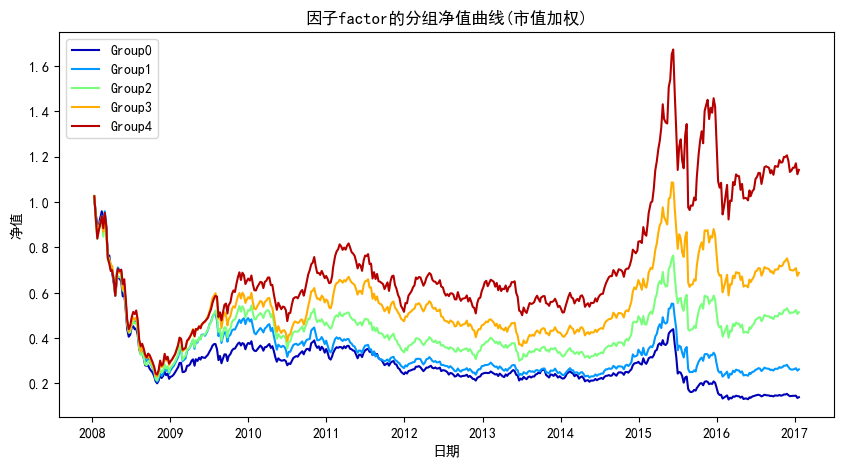

In [113]:
ew_fig1

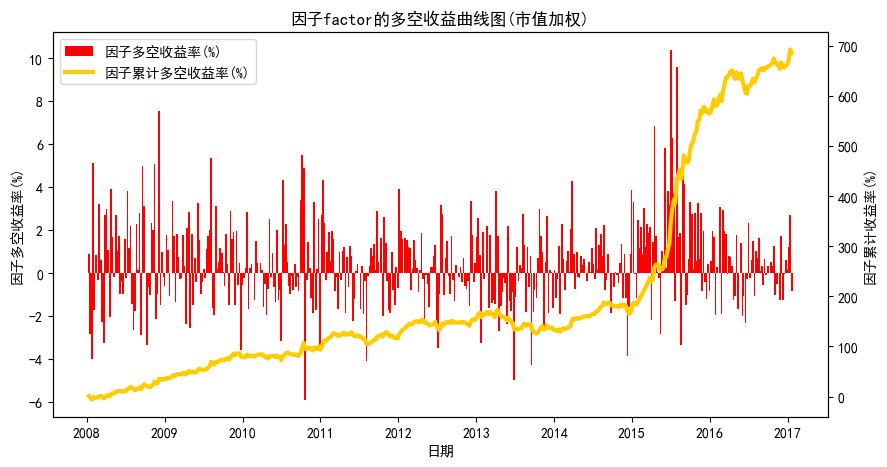

In [114]:
ew_fig2

In [115]:
mw_backtest_df,mw_fig1,mw_fig2=group_calc.analysis_group_ret(factor_df, ret_df, 'factor', n_groups=5, mktmv_df=mktmv_df)
mw_backtest_df

c:\Users\jhwei\Desktop\Code\学习\因子回测框架\factor_backtest\group_calc.py:117: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(["trade_date", group_name])


Group0     Group1     Group2     Group3     Group4         H-L
年化收益率(%) -65.779073 -51.754734 -30.364634 -18.411843   7.509155  207.214266
年化波动率(%)  75.292173  77.891808  76.655887  76.458302  79.518161   31.173830
夏普比率      -0.873651  -0.664444  -0.396116  -0.240809   0.094433    6.647058
最大回撤(%)  -87.314994 -79.451460 -79.316866 -77.564071 -76.703663  -17.304287

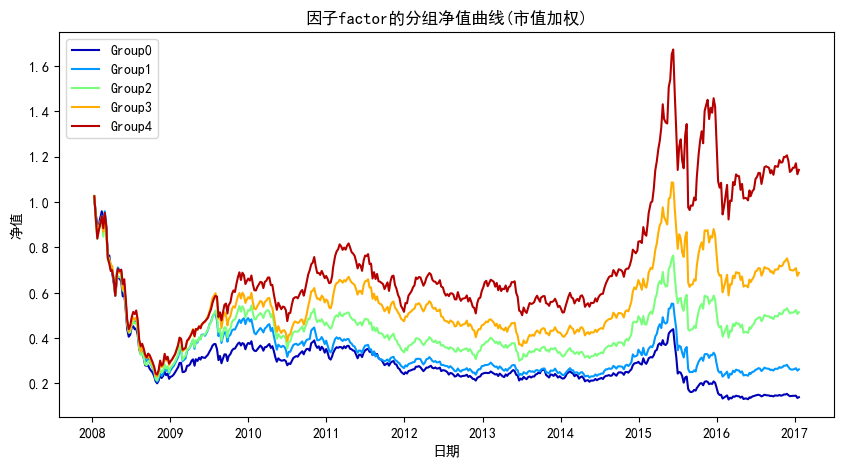

In [116]:
mw_fig1

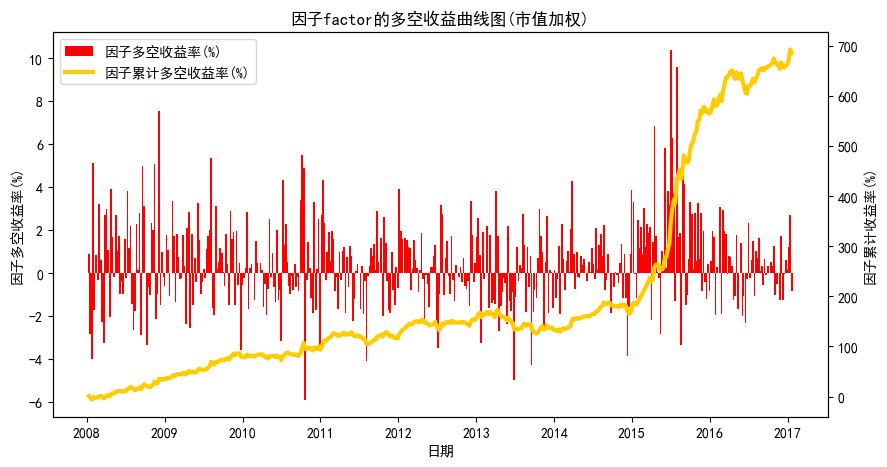

In [117]:
mw_fig2

# 双因子分析

In [118]:



import datetime
start=datetime.datetime.now()

db_sort_group_ret = group_calc.get_double_sort_group_ret(
    bp_df,
    factor_df,
    ret_df,
    "bp",
    "factor",
    5,
    5,
    mktmv_df=mktmv_df,
)

db_sort_mean_df = group_calc.double_sort_mean(db_sort_group_ret,"bp","factor")

db_sort_backtest_df = group_calc.double_sort_backtest(db_sort_group_ret, "bp", "factor", benchmark=None, period="WEEKLY")
two_factor_df = pd.merge(factor_df, bp_df, on=['trade_date', 'stock_code'])
fmreg_res_dct = factor_analysis.fama_macbeth_reg(ret_df, two_factor_df, ['factor', 'bp'])

end=datetime.datetime.now()
print('Running time: %s Seconds'%(end-start))

c:\Users\jhwei\Desktop\Code\学习\因子回测框架\factor_backtest\group_calc.py:385: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = df.groupby(["trade_date", group1_name, group2_name])


Running time: 0:00:12.399972 Seconds


c:\Users\jhwei\Desktop\Code\学习\因子回测框架\factor_backtest\factor_analysis.py:242: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "Average-Obs": fama_macbeth.time_info[0],


In [119]:
import pandas as pd
import numpy as np

# 设置随机种子以确保结果可重现
np.random.seed(42)

# 生成日期序列（假设为100个交易日）
dates = pd.date_range(start='2023-01-01', periods=100, freq='B')

# 生成因子收益率序列 (100行，2列：trade_date + Factor_Return)
factor_ret = pd.DataFrame(
    np.random.normal(loc=0.0005, scale=0.01, size=(100, 1)),
    columns=['Factor_Return']
)
factor_ret['trade_date'] = dates

# 生成风险因子收益率矩阵 (100行，6列：trade_date + 5个风险因子)
risk_factor_ret = pd.DataFrame(
    np.random.normal(loc=0.0002, scale=0.008, size=(100, 5)),
    columns=[f'Risk_Factor_{i+1}' for i in range(5)]
)
risk_factor_ret['trade_date'] = dates

# 调整列顺序，让 trade_date 作为第一列
factor_ret = factor_ret[['trade_date', 'Factor_Return']]
risk_factor_ret = risk_factor_ret[['trade_date'] + [f'Risk_Factor_{i+1}' for i in range(5)]]

In [120]:
factor_ret

trade_date  Factor_Return
0  2023-01-02       0.005467
1  2023-01-03      -0.000883
2  2023-01-04       0.006977
3  2023-01-05       0.015730
4  2023-01-06      -0.001842
..        ...            ...
95 2023-05-15      -0.014135
96 2023-05-16       0.003461
97 2023-05-17       0.003111
98 2023-05-18       0.000551
99 2023-05-19      -0.001846

[100 rows x 2 columns]

In [121]:
risk_factor_ret

trade_date  Risk_Factor_1  Risk_Factor_2  Risk_Factor_3  Risk_Factor_4  \
0  2023-01-02      -0.011123      -0.003165      -0.002542      -0.006218   
1  2023-01-03       0.003432       0.015289       0.001597       0.002260   
2  2023-01-04      -0.015150      -0.000012       0.000682       0.019906   
3  2023-01-05       0.002612      -0.000078      -0.009149       0.009343   
4  2023-01-06       0.006528      -0.007075       0.011422      -0.011015   
..        ...            ...            ...            ...            ...   
95 2023-05-15      -0.017489       0.002085       0.006367      -0.011629   
96 2023-05-16       0.002908      -0.003122       0.005262       0.018366   
97 2023-05-17       0.002186      -0.003475      -0.006599       0.006843   
98 2023-05-18       0.000773      -0.003621       0.004032       0.002869   
99 2023-05-19      -0.003880      -0.001959      -0.007630      -0.003354   

    Risk_Factor_5  
0       -0.001090  
1       -0.000396  
2       -0.001339  
3        0.006215  
4        0.004895  
..            ...  
95       0.009350  
96       0.001655  
97      -0.006649  
98       0.008500  
99       0.003218  

[100 rows x 6 columns]

In [122]:
raa = factor_analysis.risk_adj_alpha(factor_ret, risk_factor_ret, max_lags=None)
raa

(np.float64(-0.000642913309718935), np.float64(-0.7551098705081241))